# Mission 1. Netfilx and Code

## Mandatory Part

### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오

- 한국 작품은 총 얼마나 있는가? 
    - country column을 기준으로 한다. 
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)



In [ ]:
import pandas as pd
import numpy as np

netflix_df = pd.read_csv('C:/Users/82103/Desktop/pythonn/netflix_titles.csv')
netflix_df.head()

In [125]:
print('한국 작품은 {0}개'.format(len(netflix_df[netflix_df['country']=='South Korea'])))

한국 작품은 183개


## Bonus Part

### 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가? 
    - country column을 기준으로 한다. 
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [127]:
netfilx_df_country = netflix_df['country'].groupby(by = netflix_df['country'])
result=netfilx_df_country.count().sort_values(ascending=False)
print("가장 많은 작품이 올라온 국가 : {}".format(result.index[0]))
print("작품개수 : {}개".format(result.values[0]))

가장 많은 작품이 올라온 국가 : United States
작품개수 : 2555개


# Mission 2. 가즈아!

## Mandatory Part

### 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다. 
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다. 
- 이동평균의 기준은 Open Column으로 계산합니다. 
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
bitcoin_df = pd.read_csv('C:/Users/82103/Desktop/pythonn/BitCoin.csv')
bitcoin_df.head()

Unnamed: 0        Date     Open     High      Low    Close        Volume  \
0           0  2017-09-22  3628.02  3758.27  3553.53  3630.70  1.194830e+09   
1           1  2017-09-21  3901.47  3916.42  3613.63  3631.04  1.411480e+09   
2           2  2017-09-20  3916.36  4031.39  3857.73  3905.95  1.213830e+09   
3           3  2017-09-19  4073.79  4094.07  3868.87  3924.97  1.563980e+09   
4           4  2017-09-18  3591.09  4079.23  3591.09  4065.20  1.943210e+09   

    Market Cap  
0  60152300000  
1  64677600000  
2  64918500000  
3  67520300000  
4  59514100000

In [129]:
bitcoin_df_day = bitcoin_df[bitcoin_df['Date']>='2016-06-01']
bitcoin_df_day = bitcoin_df_day[bitcoin_df_day['Date']<='2017-06-30']
bitcoin = bitcoin_df_day.sort_values(by = 'Date')
moveaver = bitcoin['Open'].rolling(5).mean()

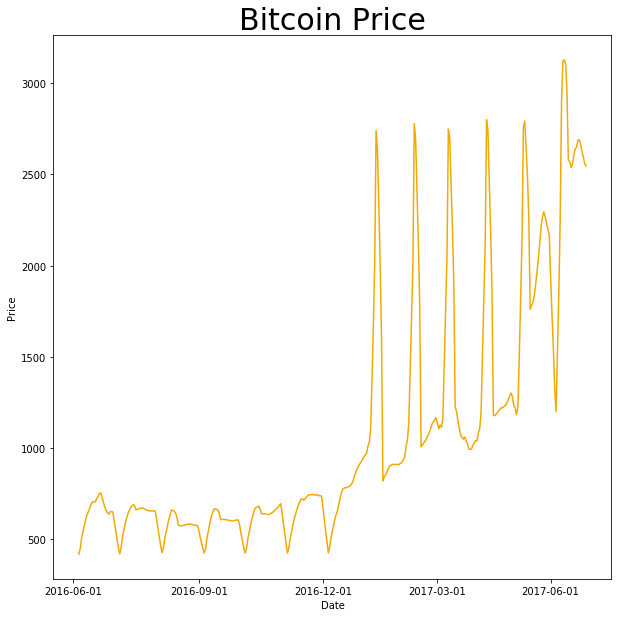

In [134]:

plt.figure(figsize=(10,10))
plt.plot(bitcoin['Date'],moveaver,color='#f2a900')
plt.title('Bitcoin Price',size = 30, weight=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(['2016-06-01','2016-09-01','2016-12-01','2017-03-01','2017-06-01'])
plt.show()

## Bonus Part

### 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때,
### 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다. 
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다. 
- 이동평균의 기준은 Open Column으로 계산합니다. 
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [98]:
ethereum = pd.read_csv('C:/Users/82103/Desktop/pythonn/archives/ETH_day.csv')
ethereum.head()

Date  Symbol    Open    High     Low   Close  Volume ETH  Volume USD
0  2020-04-15  ETHUSD  158.61  158.61  158.61  158.61        0.00        0.00
1  2020-04-14  ETHUSD  156.97  162.15  155.74  158.61    18061.58  2872210.44
2  2020-04-13  ETHUSD  158.56  159.51  150.12  156.97    15698.32  2416728.28
3  2020-04-12  ETHUSD  158.66  165.37  155.21  158.56    12877.33  2082804.05
4  2020-04-11  ETHUSD  158.26  161.49  154.25  158.66    13761.72  2172914.57

In [102]:
ethereum = ethereum[ethereum['Date']>='2016-06-01']
ethereum = ethereum[ethereum['Date']<='2017-06-30']
ethereum = ethereum.sort_values(by = 'Date')
moveaver2 = ethereum['Open'].rolling(5).mean()
ethereum.head()

Date  Symbol   Open   High    Low  Close  Volume ETH  Volume USD
1414  2016-06-01  ETHUSD  14.18  14.35  13.54  13.95     6390.06    89027.81
1413  2016-06-02  ETHUSD  13.95  14.13  13.82  13.90      942.85    13180.38
1412  2016-06-03  ETHUSD  13.90  16.05  13.50  14.02    11426.53   157342.19
1411  2016-06-04  ETHUSD  14.02  14.16  13.64  13.86     4330.50    59977.39
1410  2016-06-05  ETHUSD  13.86  13.92  13.70  13.91      787.49    10869.67

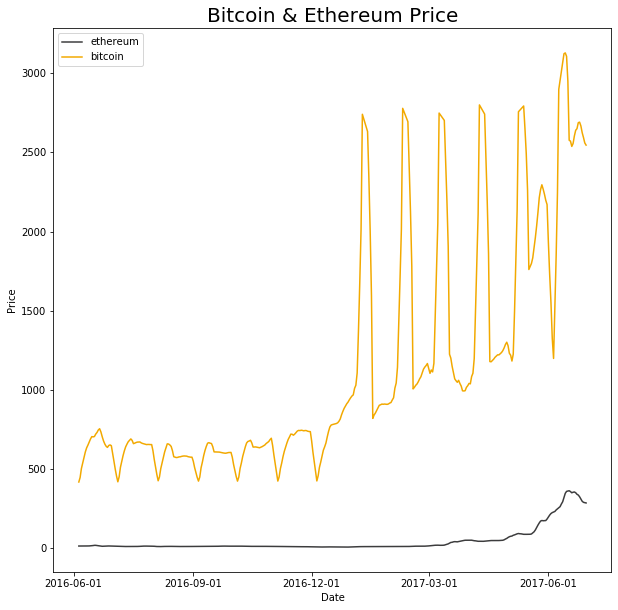

In [136]:
plt.figure(figsize=(10,10))
plt.plot(ethereum['Date'],moveaver2,color='#3c3c3d',label='ethereum')
plt.plot(bitcoin['Date'],moveaver,color='#f2a900',label='bitcoin')
plt.title("Bitcoin & Ethereum Price",size=20, weight = 20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(['2016-06-01','2016-09-01','2016-12-01','2017-03-01','2017-06-01'])
plt.legend()
plt.show()